In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numpy as np

np.random.seed(0)  # Seed the random number generator for reproducibility

# Set the parameters for the lognormal distribution
mean_of_final_distribution = 500e3
std_dev_of_final_distribution = 500e3

mean = np.log(mean_of_final_distribution / np.sqrt(1 + (std_dev_of_final_distribution / mean_of_final_distribution)**2))
std_dev = np.sqrt(np.log(1 + (std_dev_of_final_distribution / mean_of_final_distribution)**2))

size = 10000  # Number of samples to generate

# Generate samples from the lognormal distribution
samples = np.random.lognormal(mean, std_dev, size)

# Print the generated samples' five number summary
print(f"Min: {np.min(samples):,.0f}")
print(f"Q1: {np.percentile(samples, 25):,.0f}")
print(f"Median: {np.median(samples):,.0f}")
print(f"Q3: {np.percentile(samples, 75):,.0f}")
print(f"Max: {np.max(samples):,.0f}")

Min: 15,708
Q1: 199,102
Median: 345,674
Q3: 605,430
Max: 8,375,987


In [2]:
import pandas as pd
df = pd.DataFrame(samples, columns=['price'])

### take log then plot route

   bin_start    bin_end     label
0   9.642510  10.265212  10 to 10
1  10.265212  10.887913  10 to 11
2  10.887913  11.510614  11 to 12
3  11.510614  12.133316  12 to 12
4  12.133316  12.756017  12 to 13
5  12.756017  13.378718  13 to 13
6  13.378718  14.001420  13 to 14
7  14.001420  14.624121  14 to 15
8  14.624121  15.246822  15 to 15
9  15.246822  15.869524  15 to 16


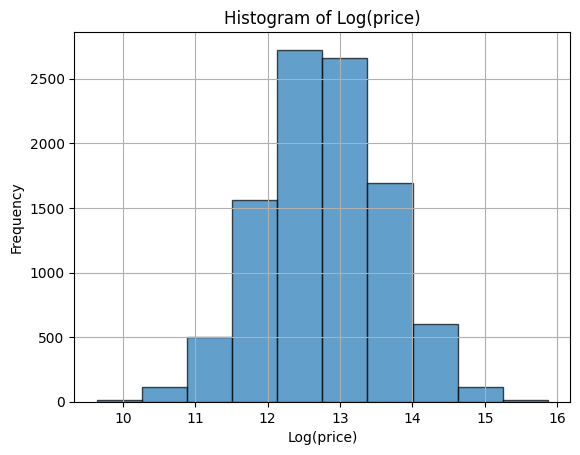

In [13]:
log_data = np.log(df['price'])

# Plot histogram using log data and capture the return values
hist_values, bin_edges, patches = plt.hist(
    log_data, bins=10, edgecolor='black', alpha=0.7)

# Print the bin edges
bin_start = bin_edges[:-1]
bin_end = bin_edges[1:]
labels = [f'{start:,.0f} to {end:,.0f}' for start, end in zip(bin_start, bin_end)]
df_bin = pd.DataFrame({'bin_start': bin_start, 'bin_end': bin_end, 'label': labels})
print(df_bin)

plt.xlabel('Log(price)')
plt.ylabel('Frequency')
plt.title('Histogram of Log(price)')
plt.grid(True)
plt.show()

   bin_start    bin_end     label          original_label
0   9.642510  10.265212  10 to 10        15,406 to 28,716
1  10.265212  10.887913  10 to 11        28,716 to 53,525
2  10.887913  11.510614  11 to 12        53,525 to 99,769
3  11.510614  12.133316  12 to 12       99,769 to 185,965
4  12.133316  12.756017  12 to 13      185,965 to 346,631
5  12.756017  13.378718  13 to 13      346,631 to 646,106
6  13.378718  14.001420  13 to 14    646,106 to 1,204,313
7  14.001420  14.624121  14 to 15  1,204,313 to 2,244,786
8  14.624121  15.246822  15 to 15  2,244,786 to 4,184,184
9  15.246822  15.869524  15 to 16  4,184,184 to 7,799,136


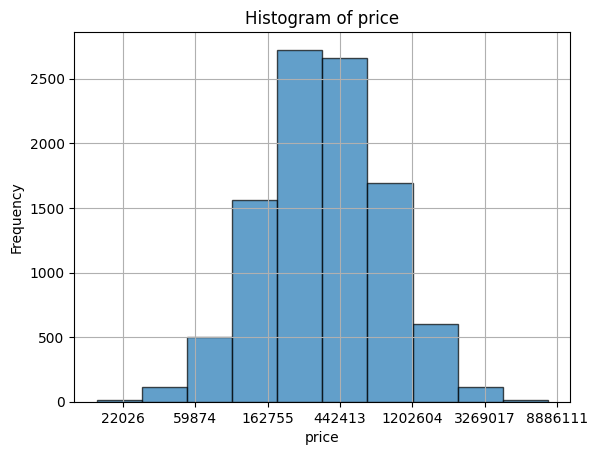

In [14]:
from matplotlib.ticker import FuncFormatter

# Define a custom formatter function to convert log prices back to original prices
def exp_formatter(x, pos):
    return '{:0.0f}'.format(np.exp(x))

log_data = np.log(df['price'])

# Plot histogram using log data and capture the return values
hist_values, bin_edges, patches = plt.hist(
    log_data, bins=10, edgecolor='black', alpha=0.7)

# Apply the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(exp_formatter))

# Print the bin edges
bin_start = bin_edges[:-1]
bin_end = bin_edges[1:]
labels = [f'{start:,.0f} to {end:,.0f}' for start, end in zip(bin_start, bin_end)]
original_labels = [f'{np.exp(start):,.0f} to {np.exp(end):,.0f}' for start, end in zip(bin_start, bin_end)]
df_bin = pd.DataFrame({'bin_start': bin_start, 'bin_end': bin_end, 'label': labels, 'original_label': original_labels})
print(df_bin)

plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram of price')
plt.grid(True)
plt.show()



### hardcoded values route

In [5]:
bins = [
    0,
    1_000,
    5_000,
    10_000,
    50_000,
    100_000,
    500_000,
    1_000_000,
    5_000_000,
    10_000_000,
    50_000_000,
    100_000_000,
]
bin_starts = bins[:-1]
bin_ends = bins[1:]

counts, _ = np.histogram(samples, bins=bins)
print(f"number of samples larger than max(bin_ends): {np.sum(samples > max(bin_ends))}")
df = pd.DataFrame({"bin_starts": bin_starts, "bin_ends": bin_ends, "counts": counts})
df["labels"] = [
    f"{int(start):,} - {int(end):,}"
    for start, end in zip(df["bin_starts"], df["bin_ends"])
]
df

number of samples larger than max(bin_ends): 0


,bin_starts,bin_ends,counts,labels
0,0,1000,0,"0 - 1,000"
1,1000,5000,0,"1,000 - 5,000"
2,5000,10000,0,"5,000 - 10,000"
3,10000,50000,87,"10,000 - 50,000"
4,50000,100000,562,"50,000 - 100,000"
5,100000,500000,6078,"100,000 - 500,000"
6,500000,1000000,2262,"500,000 - 1,000,000"
7,1000000,5000000,1006,"1,000,000 - 5,000,000"
8,5000000,10000000,5,"5,000,000 - 10,000,000"
9,10000000,50000000,0,"10,000,000 - 50,000,000"


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '0 - 1,000'),
  Text(1, 0, '1,000 - 5,000'),
  Text(2, 0, '5,000 - 10,000'),
  Text(3, 0, '10,000 - 50,000'),
  Text(4, 0, '50,000 - 100,000'),
  Text(5, 0, '100,000 - 500,000'),
  Text(6, 0, '500,000 - 1,000,000'),
  Text(7, 0, '1,000,000 - 5,000,000'),
  Text(8, 0, '5,000,000 - 10,000,000'),
  Text(9, 0, '10,000,000 - 50,000,000'),
  Text(10, 0, '50,000,000 - 100,000,000')])

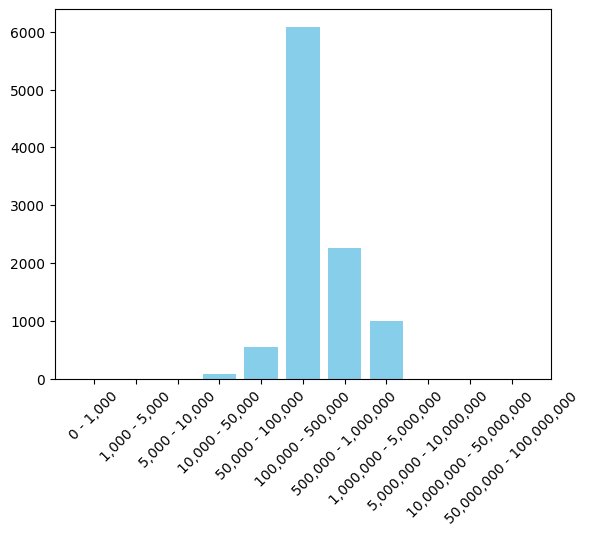

In [9]:
plt.bar(df["labels"], df["counts"], color="skyblue")
plt.xticks(rotation=45)